# Imports

In [1]:
from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

### Tensorflow & TensordBoard ( Visulaizing Learning )

In [3]:
import tensorflow as tf
from keras.callbacks import TensorBoard

### Data Manipulation

In [4]:
import os
import numpy as np
import random

### Build Neural Network

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout

### Image Pre-Processing

In [6]:
from keras.preprocessing.image import img_to_array, load_img
import cv2

# Constants

In [49]:
IMG_W = 96
IMG_H = 96

CHUNNELS = 3

LABLES = ["healthy", "diseased"]
UNITS = len(LABLES)
LOGGING_PATH = 'tenserboard/'

# Loading Images

### Createing Function to Load Dataset

In [8]:
def create_dataset(path_str):
    counter = 0
    imgs_with_labels = []
    
    for label in LABLES:
        class_num = LABLES.index(label) # using index number of label, rather then use the name of a label
        path = os.path.join(path_str,label)
        for img in os.listdir(path): 
            counter += 1            
            pic_array = cv2.imread(os.path.join(path,img)) # ,cv2.IMREAD_GRAYSCALE
            pic_array = cv2.resize(pic_array, (IMG_W, IMG_H))
            imgs_with_labels.append([pic_array, class_num])
            
        print(f'Label: {path}, Counter: {counter}')
        counter = 0
    return imgs_with_labels

### Createing Train, Test and Validation Dataset

In [9]:
xy_train = create_dataset('dataset/train/')

Label: dataset/train/healthy, Counter: 544
Label: dataset/train/diseased, Counter: 322


In [10]:
xy_test = create_dataset('dataset/test/')

Label: dataset/test/healthy, Counter: 180
Label: dataset/test/diseased, Counter: 161


In [12]:
xy_val = create_dataset('dataset/valid/')

Label: dataset/valid/healthy, Counter: 180
Label: dataset/valid/diseased, Counter: 322


# Pre-Processing & Data Manipulation

### Shuffling Data

In [14]:
random.shuffle(xy_train)
random.shuffle(xy_val)

### Separating Features from Labels

In [15]:
def xy_seperater(dataset):
    x, y = [], []
    for features,label in dataset:
        x.append(features)
        y.append(label)
    return x, y

In [16]:
x_train, y_train = xy_seperater(xy_train)
x_val, y_val = xy_seperater(xy_val)

In [33]:
x_test, y_test = xy_seperater(xy_test)

### Reshaping Array List to Numpy List

In [17]:
def reshaping_to_numpy(x, y):
    x = np.array(x).reshape(-1, IMG_W, IMG_H, CHUNNELS)
    y = np.array(y).reshape(-1, 1)
    x = x / 255.0
    return x, y

In [18]:
x_train, y_train = reshaping_to_numpy(x_train, y_train)
x_val, y_val = reshaping_to_numpy(x_val, y_val)

In [35]:
x_test, y_test = reshaping_to_numpy(x_test, y_test)

# Neural Network

In [50]:
model = Sequential([  
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', 
           input_shape=(IMG_W, IMG_H, CHUNNELS)),
    
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Dropout(0.2, seed=42),
    
    Flatten(),
    
    Dropout(0.25, seed=42),
    
    Dense(units=UNITS, activation='softmax')

])

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 36864)            

# Tensorboard ( Visualization Learing  ) 

In [53]:
def get_TensorBoard(model_name):
    folder_name = f'{model_name} at {strftime("%H %M %S")}'
    dir_paths = os.path.join(LOGGING_PATH, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Seccessfully created directory')
        
    return TensorBoard(log_dir=dir_paths)

# Fit Model

In [54]:
%%time
nr_epochs = 10
model.fit(x_train, y_train, epochs=nr_epochs, verbose=1, 
            callbacks=[get_TensorBoard('Model')], validation_data=(x_val, y_val))

Seccessfully created directory
Epoch 1/10
28/28 [==============================] - 15s 526ms/step - loss: 0.6018 - accuracy: 0.7055 - val_loss: 0.4842 - val_accuracy: 0.8227
Epoch 2/10
28/28 [==============================] - 14s 510ms/step - loss: 0.3171 - accuracy: 0.8707 - val_loss: 0.3195 - val_accuracy: 0.8765
Epoch 3/10
28/28 [==============================] - 14s 516ms/step - loss: 0.2238 - accuracy: 0.9030 - val_loss: 0.2558 - val_accuracy: 0.9024
Epoch 4/10
28/28 [==============================] - 13s 456ms/step - loss: 0.1558 - accuracy: 0.9365 - val_loss: 0.3867 - val_accuracy: 0.8267
Epoch 5/10
28/28 [==============================] - 13s 451ms/step - loss: 0.1584 - accuracy: 0.9319 - val_loss: 0.2570 - val_accuracy: 0.8964
Epoch 6/10
28/28 [==============================] - 13s 450ms/step - loss: 0.1418 - accuracy: 0.9376 - val_loss: 0.2051 - val_accuracy: 0.9263
Epoch 7/10
28/28 [==============================] - 13s 456ms/step - loss: 0.1079 - accuracy: 0.9654 - val_loss

# Evaluation & Prediction

In [55]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 1s 108ms/step - loss: 0.1773 - accuracy: 0.9267


[0.17729316651821136, 0.9266862273216248]

### Confusion Matrix

In [56]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=model.predict_classes(x_test))
conf_matrix.shape

(2, 2)

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[166  14]
 [ 11 150]]


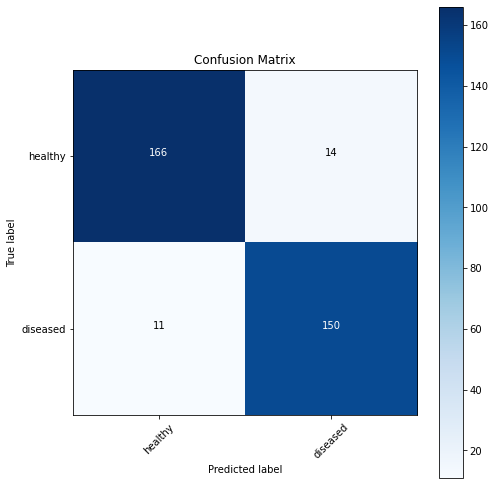

In [66]:
plot_confusion_matrix(cm=conf_matrix, classes=LABLES, title='Confusion Matrix')

### Prediction

In [68]:
prediction = model.predict(x_test)

In [72]:
np.round(prediction)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [73]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    